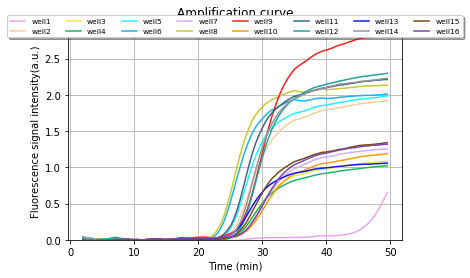

In [6]:
import pandas as pd
import os
from datetime import datetime, time
import matplotlib.pyplot as plt
import cv2 as cv

# 讀取該資料
raw_file_path = "./data/2021_10_22_16_26_07pos.csv"

# 顏色
colorTab_More4 = ['#e8a5eb', '#facc9e', '#e8e948', '#1bb763',
                       '#25f2f3', '#1db3ea', '#d1aef8', '#c8c92c',
                       '#f32020', '#fd9b09', '#406386', '#24a1a1',
                       '#1515f8', '#959697', '#744a20', '#7b45a5']


def get_accumulation_time():
    df_time = df_normalization['time']
    time_ori = datetime.strptime(df_time[0], "%H:%M:%S")
    time_delta = []
    for time in df_time:
        time_now = datetime.strptime(time, "%H:%M:%S")
        time_delta.append((time_now - time_ori).seconds/60)
    df_normalization.insert(1, column="accumulation", value=time_delta)
    

def get_StdDev_and_Avg():
    StdDev = []
    Avg = []
    for i in range(0, 16):
        df_current_well = df_normalization[f'well_{i+1}']
        StdDev.append(df_current_well[first_time*2:twice_time*2].std())
        Avg.append(df_current_well[first_time:twice_time].mean())
    return StdDev, Avg

def normalize():
    for i in range(0, 16):
        df_current_well = df_raw[f'well_{i+1}']
        baseline = df_current_well[first_time*2:twice_time*2].mean()
        df_normalization[f'well{i+1}'] = (df_raw[f'well_{i+1}']-baseline) / baseline # normalized = (IF(t)-IF(b))/IF(b)

def Moving_Average():
    for i in range(0,16,1):
        well_move_average.append(df_raw["well_" + str(i+1)].rolling(window=5).mean())


def get_ct_threshold():
    threshold_value = []
    StdDev, Avg = get_StdDev_and_Avg()
    for i in range(0, 16):
        threshold_value.append(n_sd*StdDev[i] + Avg[i])
    return threshold_value

def get_ct_value(threshold_value):
    Ct_value = []
    for i in range(0, 16):
        df_current_well = df_normalization[f'well_{i+1}']
        df_accumulation = df_normalization['accumulation']
        print("\n")
        try:
            for j, row in enumerate(df_current_well):
                if row >= threshold_value[i]:
                    # print(f"row: {row}")
                    thres_lower = df_current_well[j-1]
                    thres_upper = df_current_well[j]                
                    acc_time_lower = df_accumulation[j-1]
                    acc_time_upper = df_accumulation[j+1]
                    
                    # linear regression
                    x2 = acc_time_upper
                    y2 = thres_upper
                    x1 = acc_time_lower
                    y1 = thres_lower
                    y = threshold_value[i]
                    x = (x2-x1)*(y-y1)/(y2-y1)+x1

                    Ct_value.append(round(x, 2))
                    # print(f"Ct of well_{i+1} is {round(x, 2)}")
                    break

                # if there is no Ct_value availible
                elif j == len(df_current_well)-1:
                    Ct_value.append(99.99)
        except Exception as e:
            Ct_value.append(99.99)

    return Ct_value

def take_photo():        
    well_1_data = []
    well_2_data = []
    well_3_data = []
    well_4_data = []
    well_5_data = []
    well_6_data = []
    well_7_data = []
    well_8_data = []
    well_9_data = []
    well_10_data = []
    well_11_data = []
    well_12_data = []
    well_13_data = []
    well_14_data = []
    well_15_data = []
    well_16_data = []
    all_well = []
    time_array = []

    for i in range(1,17,1):
        all_well.append(df_normalization["well"+str(i)].rolling(window=5).mean())
    temp_well = pd.DataFrame(all_well)
    Csv_well = temp_well.T

    for i in range(0,len(Csv_well.index),1):
        well_1_data.append(Csv_well.loc[i,'well1'])
    for i in range(0,len(Csv_well.index),1):
        well_2_data.append(Csv_well.loc[i,'well2'])
    for i in range(0,len(Csv_well.index),1):
        well_3_data.append(Csv_well.loc[i,'well3'])
    for i in range(0,len(Csv_well.index),1):
        well_4_data.append(Csv_well.loc[i,'well4'])
    for i in range(0,len(Csv_well.index),1):
        well_5_data.append(Csv_well.loc[i,'well5'])
    for i in range(0,len(Csv_well.index),1):
        well_6_data.append(Csv_well.loc[i,'well6'])
    for i in range(0,len(Csv_well.index),1):
        well_7_data.append(Csv_well.loc[i,'well7'])
    for i in range(0,len(Csv_well.index),1):
        well_8_data.append(Csv_well.loc[i,'well8'])
    for i in range(0,len(Csv_well.index),1):
        well_9_data.append(Csv_well.loc[i,'well9'])
    for i in range(0,len(Csv_well.index),1):
        well_10_data.append(Csv_well.loc[i,'well10'])
    for i in range(0,len(Csv_well.index),1):
        well_11_data.append(Csv_well.loc[i,'well11'])
    for i in range(0,len(Csv_well.index),1):
        well_12_data.append(Csv_well.loc[i,'well12'])
    for i in range(0,len(Csv_well.index),1):
        well_13_data.append(Csv_well.loc[i,'well13'])
    for i in range(0,len(Csv_well.index),1):
        well_14_data.append(Csv_well.loc[i,'well14'])
    for i in range(0,len(Csv_well.index),1):
        well_15_data.append(Csv_well.loc[i,'well15'])
    for i in range(0,len(Csv_well.index),1):
        well_16_data.append(Csv_well.loc[i,'well16'])
    
    for j in range(0, len(Csv_well.index), 1):
        time_array.append(j / 2)
    plt.figure(figsize=(10, 2.5), dpi=100, linewidth=3)
    plt.plot(time_array,well_1_data,'-',color = colorTab_More4[0], label="well1")
    plt.plot(time_array,well_2_data,'-',color = colorTab_More4[1], label="well2")
    plt.plot(time_array,well_3_data,'-',color = colorTab_More4[2], label="well3")
    plt.plot(time_array,well_4_data,'-',color = colorTab_More4[3], label="well4")
    plt.plot(time_array,well_5_data,'-',color = colorTab_More4[4], label="well5")
    plt.plot(time_array,well_6_data,'-',color = colorTab_More4[5], label="well6")
    plt.plot(time_array,well_7_data,'-',color = colorTab_More4[6], label="well7")
    plt.plot(time_array,well_8_data,'-',color = colorTab_More4[7], label="well8")
    plt.plot(time_array,well_9_data,'-',color = colorTab_More4[8], label="well9")
    plt.plot(time_array,well_10_data,'-',color = colorTab_More4[9], label="well10")
    plt.plot(time_array,well_11_data,'-',color = colorTab_More4[10], label="well11")
    plt.plot(time_array,well_12_data,'-',color = colorTab_More4[11], label="well12")
    plt.plot(time_array,well_13_data,'-',color = colorTab_More4[12], label="well13")
    plt.plot(time_array,well_14_data,'-',color = colorTab_More4[13], label="well14")
    plt.plot(time_array,well_15_data,'-',color = colorTab_More4[14], label="well15")
    plt.plot(time_array,well_16_data,'-',color = colorTab_More4[15], label="well16")

    plt.ylim(0,3)
    plt.title("Amplification curve")
    plt.ylabel('Fluorescence signal intensity(a.u.)') 
    plt.xlabel('Time (min)')
    plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.05),fancybox=True, shadow=True, ncol=8,fontsize=7.5)
    plt.grid()
    plt.savefig('./result/test/CT.jpg')
    plt.show()
    return Csv_well


def ct_calculation():
    global df_raw, df_normalization ,first_time,twice_time,n_sd,well_move_average,Csv_well
    well_move_average =[]
    first_time = int(input("Input Start time:   "))
    twice_time = int(input("Input End time:   "))
    n_sd = int(input("Input Std:   "))   
    df_raw = pd.read_csv(raw_file_path)
    df_normalization = df_raw.copy()    #將df_raw複製給df_df_normalization
    get_accumulation_time()
    normalize()
    threshold_value = get_ct_threshold()
    Moving_Average()
    Ct_value = get_ct_value(threshold_value)
    Csv_well = take_photo()
    save_excel = pd.DataFrame({"well_1":[Ct_value[0]],"well_2":[Ct_value[1]],"well_3":[Ct_value[2]],"well_4":[Ct_value[3]],
                               "well_5":[Ct_value[4]],"well_6":[Ct_value[5]],"well_7":[Ct_value[6]],"well_8":[Ct_value[7]],
                               "well_9":[Ct_value[8]],"well_10":[Ct_value[9]],"well_11":[Ct_value[10]],"well_4":[Ct_value[11]],
                               "well_13":[Ct_value[12]],"well_14":[Ct_value[13]],"well_15":[Ct_value[14]],"well_16":[Ct_value[15]]}
    ,index=["CT_Value"])
    save_excel.to_csv("./result/test/CT_Value.csv",encoding= "utf_8_sig")
    Csv_well.to_csv("./result/test/move.csv",encoding= "utf_8_sig")
    
    return Ct_value

def main():
    ct_calculation()
if __name__ == '__main__':
    main()
    


In [7]:
import pandas as pd
df = pd.read_csv('./data/2021_10_22_16_26_07pos.csv',header=None)
a = df.drop([0])
# print(df.drop([0]))
print(a)

           0     1      2    3    4    5    6    7    8    9    10   11   12  \
1    16:40:56  97.6  63.46   56   65   96   99   71   75   86   71   49   86   
2    16:41:26  98.3  63.46   56   65   98   99   70   75   86   70   48   86   
3    16:41:57  98.3  63.56   55   64   98   99   70   69   85   69   49   86   
4    16:42:25  98.5  63.46   55   64   99   99   70   69   85   70   49   87   
5    16:42:56  98.5  63.46   55   64   96   98   71   69   85   68   48   86   
6    16:43:26  98.4  63.46   54   63   94   98   67   68   84   67   47   84   
7    16:43:57  98.6  63.56   54   64   96   99   68   69   85   70   48   86   
8    16:44:25  98.6  63.56   55   64   95   99   68   70   86   69   48   87   
9    16:44:56  98.6  63.56   54   64   95   99   70   69   85   69   49   87   
10   16:45:26  98.5  63.46   55   64   95   99   68   69   86   69   49   87   
11   16:45:57  98.3  63.46   54   64   96   99   68   68   86   69   49   88   
12   16:46:25  98.6  63.56   54   64   9